In [1]:
from cell_env import CellEnv
import matplotlib.pyplot as plt
import numpy as np

from plot_utils import plot_observations, evaluate_model, plot_actions
import os
WANDB_DIR = os.getenv("WANDB_DIR", ".")

In [2]:
# Example usage:

env_args = {
    "max_timesteps": 200,
    "alpha_mem": 1.0,
    "dt": 0.5,
    "frame_stack": 2,
}

# model_str = ".sweep-models/stoic-sweep-33/best_model.zip"
model_str = f"{WANDB_DIR}/sweep-models/restful-sweep-20/best_model.zip"
# model_str = 'rl-models-sde/best_model.zip'
eval_env = CellEnv(**env_args)
all_obs, all_actions, all_fractions = evaluate_model(env_args, 10, model_str, multiprocess=True)


In [ ]:
on_obs, on_actions, on_fractions = evaluate_model(env_args, 20, 'on', multiprocess=True)
off_obs, off_actions, off_fractions = evaluate_model(env_args, 20, 'off', multiprocess=True)

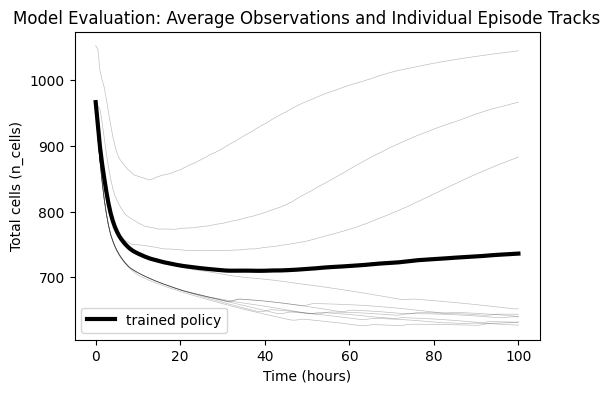

In [ ]:
plot_observations(env_args, all_obs, alpha_val=0.25)

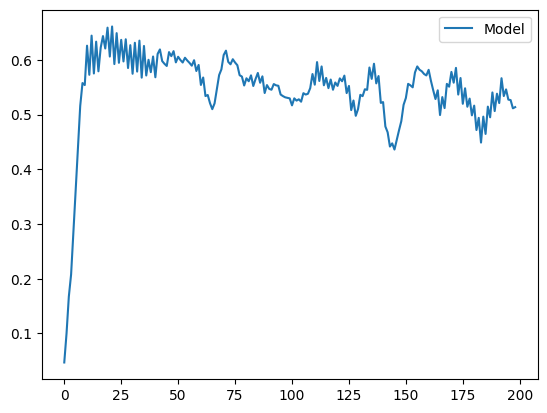

In [ ]:
plt.plot(all_fractions.mean(axis=0), label="Model")
# plt.plot(unif_fractions.mean(axis=0), label="Uniform")
plt.legend()

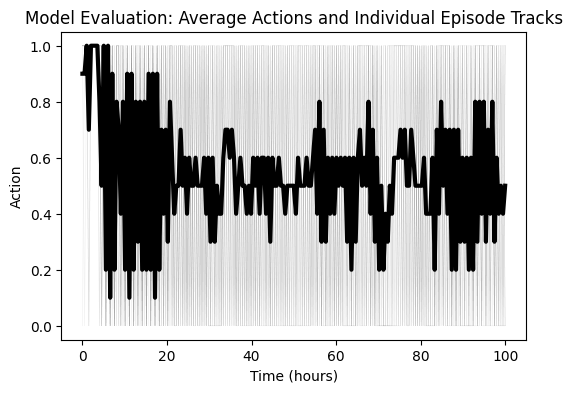

In [ ]:
plot_actions(env_args, all_actions)

In [ ]:
# bin the actions and plot average frequency in each bin over time:
avg_actions = np.array(avg_actions)
freqs=[]
time_chunks = 10
for i in range(time_chunks):
    interval = len(avg_actions)//time_chunks
    action_subset = avg_actions[interval*i:interval*(i+1)]
    # Do FT and get max frequency
    action_subset = action_subset - np.mean(action_subset)
    action_subset = np.abs(np.fft.fft(action_subset))
    action_subset = action_subset[:len(action_subset)//2]
    freqs.append(np.argmax(action_subset))
plt.plot(freqs)


NameError: name 'avg_actions' is not defined